# Multi-Layer Perceptrons
## Extend the previous example to multiple layers, and use Keras to do it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random

Let's ruin the separability of the data and see what happens

In [2]:
def generateData(n, theta = None, overlap = 0.0, verbose = 1):
    """Generate a 2D set of points and an associated decision variable,
       of length n.  The points are linearly separable by the decision variable Y.
       The line of separation is chosen to be at a random angle.  Half the points
       are on one side and half on the other.
       
       theta = angle of line separating points, in radians
       overlap = 0.1  Would be a 10% overlap along the line of separation
                      The points are still random so your results will vary
    """
    
    if not theta:
        theta = random()*np.pi
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]])
    
    n1 = np.floor(n/2)
    
    data = np.zeros((n,3))
    y = np.zeros(n)
    
    dx = 0.01 - overlap
    for i in range(n):
        if i < n1:
            pt = np.array([random()+dx,random()*2 - 1])
            y[i] = 1
        else:
            pt = np.array([-1*random()-dx,random()*2 - 1])
            y[i] = 0
        data[i,1:] = np.matmul(R,pt)
    
    data[:,0] = 1
    if verbose == 1:
        print("theta = ",np.degrees(theta))
        print("slope = ",np.tan(theta - np.pi/2))
    
    return (y,data)

theta =  -45.0
slope =  1.0


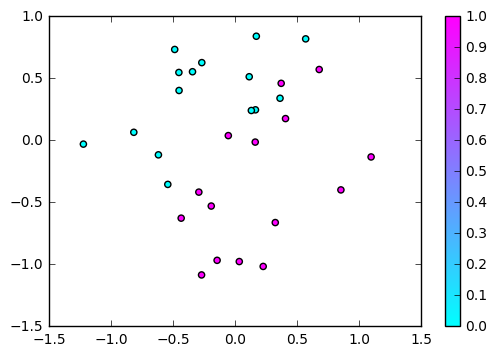

In [4]:
N = 30
Y,X = generateData(N,theta = -np.pi/4, overlap = 0.1, verbose = 1)

plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
#plt.xlim([-1.1,1.1])
#plt.ylim([-1.1,1.1])
plt.axis('equal')
plt.colorbar()
plt.show()

## Single Perceptron Learning Algorithm
### Step Function, Perceptron Criterion Loss Function

In [5]:
def plotPointsAndLine(fignum,X,Y,W):
    plt.figure(fignum)
    xplt = np.linspace(-1.1,1.1,num=50)
    yplt = -W[1]/W[2]*xplt - W[0]/W[2]
    plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
    plt.plot(xplt,yplt,'r-')
    plt.xlabel(r'$X_1$')
    plt.ylabel(r'$X_2$')
    plt.xlim([-1.1,1.1])
    plt.ylim([-1.1,1.1])
    #plt.axis('equal')
    
stepfn = np.vectorize(lambda x: 0 if x < 0 else 1)

Starting W:  [-0.86351787  1.71731982  0.06291397]
Iterations:  1000
Ending W [-0.02351787  0.56907322 -0.64661298]
Ending J 22.0


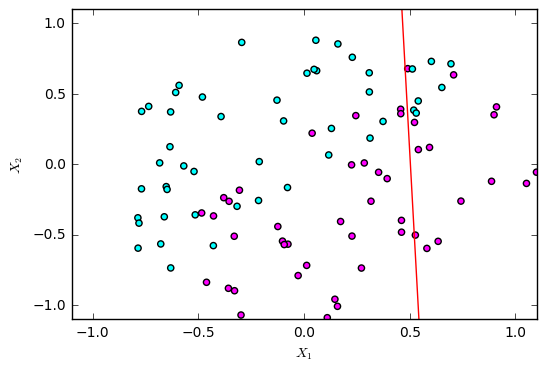

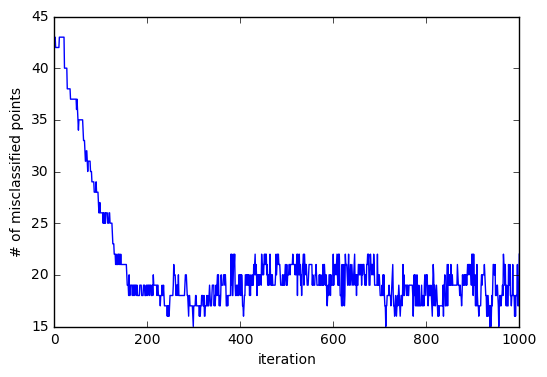

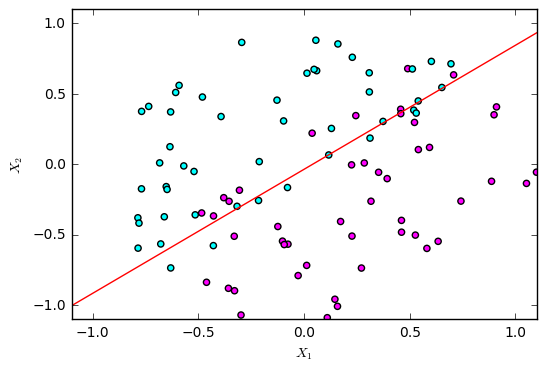

In [8]:
N = 100
Y,X = generateData(N,theta = -np.pi/4, overlap = 0.15, verbose = 0)

W = np.random.random(size=X.shape[1])*4 - 2
print('Starting W: ',W)

plotPointsAndLine(1,X,Y,W)

err = []
dW = 0.01
O = stepfn(np.matmul(X,W))
J = np.sum(np.abs(Y-O))
err.append(J)
count = 0
countMax = 1000
while J > 0 and count < countMax:
    count = count + 1
    O = stepfn(np.matmul(X,W))
    J = np.sum(np.abs(Y-O))
    err.append(J)
    gradJ = (Y-O).reshape((N,1))*X
    misclassified = gradJ[np.where(gradJ[:,0] != 0)]
    NM = misclassified.shape[0]   # how many are misclassified
    if NM == 0:
        break
    x = misclassified[np.random.randint(0,NM)]
    W = W + dW*x

print('Iterations: ',count)
print('Ending W',W)
print('Ending J',J)
plt.figure(2)
plt.plot(err)
plt.xlabel('iteration')
plt.ylabel('# of misclassified points')

plotPointsAndLine(3,X,Y,W)
plt.show()

## Let's try a different distribution of input data

In [108]:
def generateData2(n, theta = None, originSeparate = 0.1, verbose = 1):
    """Generate a 2D set of points and an associated decision variable,
       of length n.  The points for this one are in spirals.
       
       theta = angle of line separating points, in radians
       overlap = 0.1  Would be a 10% overlap along the line of separation
                      The points are still random so your results will vary
       originSeparate How much to push data away from each other at the
                      origin.  If so, then a good model should be able to get
                      to 0.0% loss
    """
    from numpy.random import random
    
    if not theta:
        theta = random()*np.pi
    c, s = np.cos(theta), np.sin(theta)
    R = np.array([[c,-s],[s,c]])
    
    n1 = int(np.floor(n/2))
    
    data = np.zeros((n,3))
    y = np.zeros(n)
    
    # polar coordinates
    r = np.append(np.linspace(originSeparate,1.0,n1), np.linspace(originSeparate,1.0,n-n1))
    t = np.append(np.linspace(0.0,1.3*np.pi,n1), np.linspace(0,1.3*np.pi,n-n1) - 2.5*np.pi/3)
    xs = r*np.cos(t) + (np.random.rand(n) - 0.5)*0.2
    ys = r*np.sin(t) + (np.random.rand(n) - 0.5)*0.2
    
    data[:,0] = 1.0
    data[:,1] = xs
    data[:,2] = ys
    
    y[0:n1] = 1
    y[n1:n] = 0

    #for i in range(n):
    #    data[i,1:] = np.matmul(R,data[i,1:])
    
    if verbose == 1:
        print("theta = ",np.degrees(theta))
        print("slope = ",np.tan(theta - np.pi/2))
    
    return (y,data)

theta =  -45.0
slope =  1.0


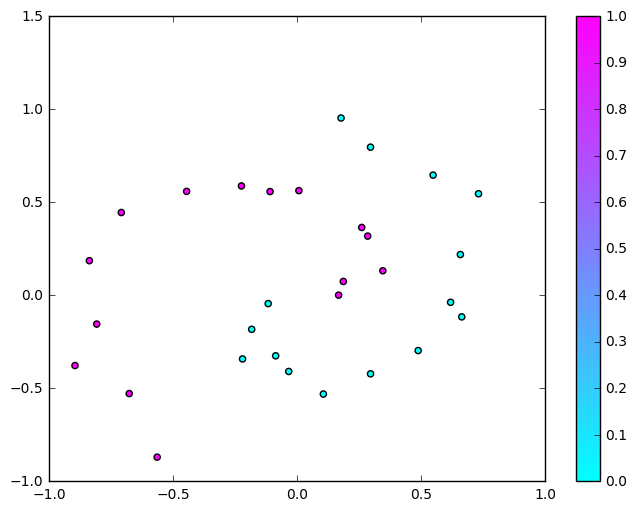

In [112]:
N = 30
Y,X = generateData2(N,theta = -np.pi/4, originSeparate = 0.2, verbose = 1)

plt.figure(1, figsize=(8, 6))
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
#plt.xlim([-1.1,1.1])
#plt.ylim([-1.1,1.1])
#plt.axis('equal')
plt.colorbar()
plt.show()

Starting W:  [-0.58620202 -0.09293927 -0.57657448]
Iterations:  500
Ending W [-0.00620202 -0.02429018  0.00935328]
Ending J 26.0


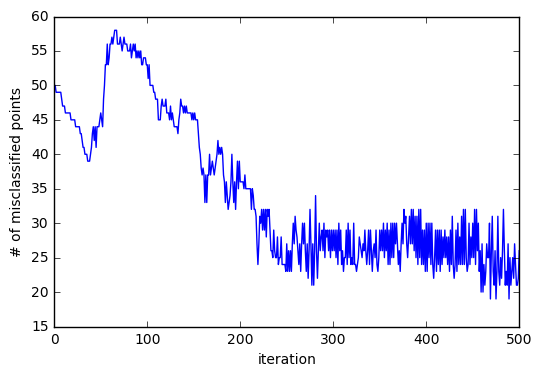

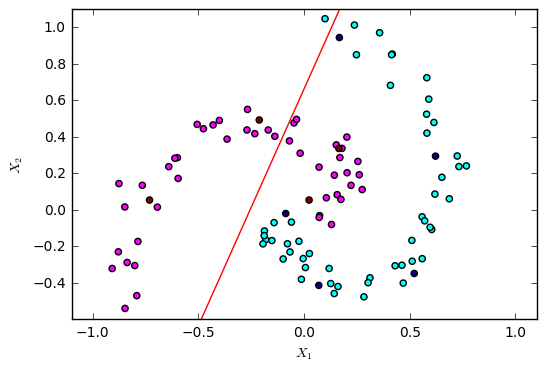

In [113]:
N = 100
Y,X = generateData2(N,theta = -np.pi/4, verbose = 0)
Ytest,Xtest = generateData2(int(N/10),theta = -np.pi/4, verbose = 0)

W = np.random.random(size=X.shape[1])*4 - 2
print('Starting W: ',W)

#plotPointsAndLine(1,X,Y,W)

err = []
dW = 0.01
O = stepfn(np.matmul(X,W))
J = np.sum(np.abs(Y-O))
err.append(J)
count = 0
countMax = 500
while J > 0 and count < countMax:
    count = count + 1
    O = stepfn(np.matmul(X,W))
    J = np.sum(np.abs(Y-O))
    err.append(J)
    gradJ = (Y-O).reshape((N,1))*X
    misclassified = gradJ[np.where(gradJ[:,0] != 0)]
    NM = misclassified.shape[0]   # how many are misclassified
    if NM == 0:
        break
    x = misclassified[np.random.randint(0,NM)]
    W = W + dW*x

print('Iterations: ',count)
print('Ending W',W)
print('Ending J',J)
plt.figure(2)
plt.plot(err)
plt.xlabel('iteration')
plt.ylabel('# of misclassified points')

plt.figure(3)
xplt = np.linspace(-1.1,1.1,num=50)
yplt = -W[1]/W[2]*xplt - W[0]/W[2]
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.scatter(Xtest[:,1],Xtest[:,2],c=Ytest)
plt.plot(xplt,yplt,'r-')
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim([-1.1,1.1])
plt.ylim([-0.6,1.1])
plt.show()

How did our model do?

In [114]:
O = stepfn(np.matmul(Xtest,W))
J = np.sum(np.abs(Ytest-O))
print('Error: {:.2%}'.format(J/len(Ytest)))

Error: 20.00%


# Keras NN Model

In [115]:
from keras.models import Sequential
from keras.layers import Dense

In [116]:
model = Sequential()
model.add(Dense(output_dim=1,init='uniform',activation='hard_sigmoid',bias=True,input_dim=2))
model.compile(optimizer='sgd',loss='mse',metrics=['binary_accuracy'])
X_train, y_train = X[:,1:], Y
X_test, y_test = Xtest[:,1:], Ytest
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=20, batch_size=1, verbose=1)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 100 samples, validate on 10 samples
Epoch 1/20
100/100 [==============================] - 0s - loss: 0.2471 - binary_accuracy: 0.6900 - val_loss: 0.2454 - val_binary_accuracy: 0.7000
Epoch 2/20
100/100 [==============================] - 0s - loss: 0.2437 - binary_accuracy: 0.6800 - val_loss: 0.2425 - val_binary_accuracy: 0.7000
Epoch 3/20
100/100 [==============================] - 0s - loss: 0.2405 - binary_accuracy: 0.6900 - val_loss: 0.2397 - val_binary_accuracy: 0.7000
Epoch 4/20
100/100 [==============================] - 0s - loss: 0.2374 - binary_accuracy: 0.7000 - val_loss: 0.2370 - val_binary_accuracy: 0.7000
Epoch 5/20
100/100 [==============================] - 0s - loss: 0.2344 - binary_accuracy: 0.7000 - val_loss: 0.2343 - val_binary_accuracy: 0.7000
Epoch 6/20
100/100 [==============================] - 0s - loss: 0.2315 - binary_accuracy: 0.7200 - val_loss: 0.2318 - val_binary_accuracy: 0.7000
Epoch 7/20
100/100 [==============================] - 0s - loss: 0.2287 -

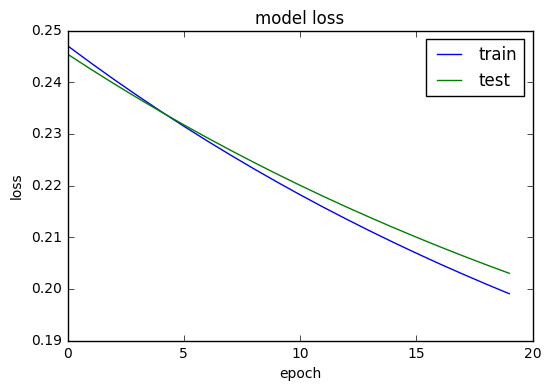

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [122]:
out = model.predict(X_test)
(y_test,out)

(array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.]),
 array([[ 0.49536297],
        [ 0.47324884],
        [ 0.55375946],
        [ 0.64929676],
        [ 0.60613263],
        [ 0.51613396],
        [ 0.47496778],
        [ 0.38443211],
        [ 0.37901175],
        [ 0.48709187]], dtype=float32))

In [123]:
stepfn(out-0.5)

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [124]:
stepfn(out-0.5) - np.reshape(y_test,(10,1))

array([[-1.],
       [-1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [132]:
xx,yy = np.meshgrid(np.linspace(-1.2,1.2,100),np.linspace(-1.2,1.2,100))
Xgrid = np.c_[xx.ravel(),yy.ravel()]
out = model.predict(Xgrid)
out = out.reshape(xx.shape)

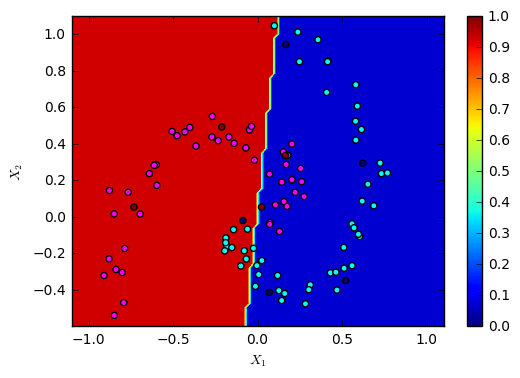

In [133]:
plt.contourf(xx,yy,stepfn(out-0.5))
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.scatter(Xtest[:,1],Xtest[:,2],c=Ytest)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim([-1.1,1.1])
plt.ylim([-0.6,1.1])
plt.colorbar()
plt.show()

In [149]:
model = Sequential()
model.add(Dense(output_dim=100,init='normal',activation='relu',bias=True,input_dim=2))
#model.add(Dense(output_dim=20,init='normal',activation="relu"))
#model.add(Dense(output_dim=20,init='normal',activation="relu"))
model.add(Dense(output_dim=1,init='normal',activation="sigmoid"))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
X_train, y_train = X[:,1:], Y
X_test, y_test = Xtest[:,1:], Ytest
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=5000, batch_size=20, verbose=0)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 0.00%


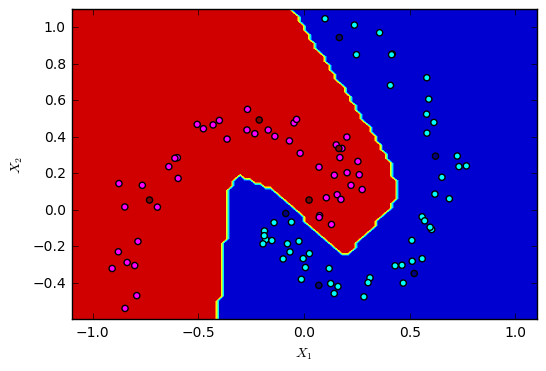

In [150]:
xx,yy = np.meshgrid(np.linspace(-1.2,1.2,100),np.linspace(-1.2,1.2,100))
Xgrid = np.c_[xx.ravel(),yy.ravel()]
out = model.predict(Xgrid)
out = out.reshape(xx.shape)
plt.contourf(xx,yy,stepfn(out-0.5))
plt.scatter(X[:,1],X[:,2],c=Y,cmap='cool')
plt.scatter(Xtest[:,1],Xtest[:,2],c=Ytest)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.xlim([-1.1,1.1])
plt.ylim([-0.6,1.1])
plt.show()

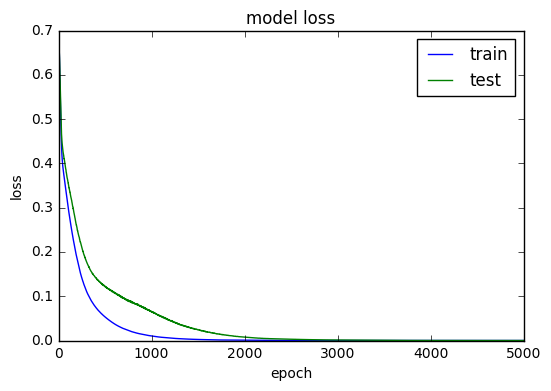

In [151]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Visualizations from the Stanford class:

1. [ConvNetsJS](http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html)
2. [3 Inputs multiple class classification](http://vision.stanford.edu/teaching/cs231n/linear-classify-demo)